# Introducción

El fundamento de Deep learning es la aproximación al Aprendizaje Automático por medio de la construcción de modelos computacionales que están compuestos por múltiples **capas** de procesamiento con el fin de aprender representaciones de los datos haciendo uso de una jerarquía de niveles de abstracción.

Esta aproximación ha mejorado de una forma espectacular el estado del arte en tareas que parecían bloqueadas desde hacía un tiempo, en donde los métodos clásicos parecían haber llegado al máximo de su capacidad de resolución, tales como el reconocimiento del habla, reconocimiento de objetos por medios visuales, detección de objetos, etc. Su uso, sin embargo, no se ha detenido en la mejora de problemas habituales en el área, sino que ha saltado a otras en las que las técnicas de IA no habían llegado a aplicars, tales como la generación de medicamentos y el análisis genómico. 

**Deep learning** es, quizás, la herramientas estrella del análisis de datos actualmente, y uno de los frameworks de desarrollo más comunes para poder aplicarlos es **Keras**. 

# La pieza fundamental: Redes Neuronales Artificiales (RNA)

En **Machine Learning** (y también en algunas ciencias relacionadas con los estudios cognitivos), una red neuronal artificial es una red inspirada en las redes de neuronas biológicas que se han usado para estimar o aproximar funciones que pueden depender de un alto número de entradas y parámetros desconocidos.

Una RNA está formada por una pila, normalmente ordenadas en forma de capas, de nodos/unidades/neuronas de cálculo que permiten pasar y transformar un conjunto de datos de entrada (dados en forma de vector) en una salida deseada. Estas unidades de cálculo elementales suelen, al menos en su forma más simple, tener una estructura simple que diferencia una etapa de *agregación con pesos* y una etapa de *activación*, tal y como muestra el siguiente diagrama, que muestra el esquema de lo que se conoce como **Perceptrón**:

<img src="./imgs/Perceptron.png" width="45%">

Desde un punto de vista algorítmico, el Perceptrón es un algoritmo de aprendizaje supervisado para clasificación binaria, estos es, define funciones que pueden decidir si una entrada determinada (que debe ser dada con una representación vectorial) pertenece a una clase o no.

Al igual que en otros modelos, como el de regresión logística, los pesos de una red neuronal se multiplican por el vector de entrada, se agregan en una sola suma, y se alimentan a una función adicional que se denomina función de activación.

A partir de estas unidades simples se puede construir una Red de Perceptrones por medio de un apilamiento de capas, dando lugar a lo que se conoce como **Perceptrón Multicapa** (`MLP`, por sus siglas en inglés).

<img src="./imgs/MLP.png" width="45%">

Así pues, una MLP vendrá dada por una asignación de pesos en las conexiones que dan entrada a cada una de las neuronas, junto con la función de activación que procesa la entrada ponderada y agregada antes de ser mandada a la siguiente capa (o a la salida).

En general, el proceso de construcción de una red así pasa por decidir la arquitectura (topología) de distribución de nodos, los pesos asignados a las conexiones entre ellos, y la función de activación. Normalmente, se fijan la arquitectura y la función de activación, y se seleccionan los pesos adecuados para el objetivo por medio de un proceso de ajuste de parámetros que se denomina **aprendizaje** o **entrenamiento**.

Veamos cómo funcionaría un proceso de entrenamiento para una red simple siguiendo el método más común y efectivo:

# Red Neuronal con una sola capa

<img src="./imgs/single_layer.png" width="65%" />

_(Source: Python Machine Learning, S. Raschka)_

### Cómo encontrar los pesos ideales

La idea fundamental del proceso de entrenamiento es verlo como un proceso de optimización de una función adecuada. En nuestro caso, y con el fin de que la función que calcula la red se diferencie lo mínimo posible de la función objetivo que queremos modelar, se hace uso de un proceso estándar de minimización usando la función de error (que mide esa *diferencia*) como función de optimización.

Para ello, una de las primeras opciones es usar el algoritmo de **descenso del gradiente**.

$$
w = w + \Delta w, \text{donde } \Delta w = - \eta \nabla J(w)
$$

Donde $J$ será una función adecuada que mida ese error cometido, por ejemplo: **la suma de los errroes cuadráticos** (SSE). Es decir, para cada posible valores de pesos, $w$, la función $J(w)$ ideal devuelve el error de la función que esos pesos definen. Como no podemos calcular el error que se comete respecto a una función que desconocemos, lo que se hace es medir el error que se produce sobre un conjunto de datos de los que sí conocemos cuánto debería dar la función objetivo, y que se conoce como **conjunto de entrenamiento**.

En el proceso anterior, multiplicamos el gradiente por un factor, llamado **tasa de aprendizaje**, que permite aproximar por pasos sucesivos el conjunto de pesos para acercarnos a aquellos que supongan un mínimo para la función $J$.

Teniendo en cuenta este procedimiento, hemos de verificar que las diversas funciones involucradas deben ser derivables para que el descenso del gradiente de un resultado coherente.

### Descenso del Gradiente

En la **optimización por descenso del gradiente**, actualizamos todos los pesos simultáneamente tras cada **epoch** (así se denomina al proceso de *mostrarle* todos los datos de entrenamiento al algoritmo), y a partir de los resultados se define la derivada parcial de cada peso $w_j$ del vector $w$:

$$
\frac{\partial}{\partial w_j} J(w) = \sum_{i} ( y^{(i)} - a^{(i)} )  x^{(i)}_j
$$

**Nota**: en la fórmula anterior, el superíndice $(i)$ se refiere a la $i$-ésima muestra del conjunto de datos, y el subíndice $j$ se refiere a la posición del peso $w_j$ en el vector. Por tanto, $y^{(i)}$ es el valor real que se debería obtener con la entrada $i$-ésima y $a^{(i)}$ es la **activación** (salida, en este caso) de la neurona. 

En el caso particular del Perceptrón original, esta activación era lineal: 

Se define la **función de activación** $\phi(\cdot)$ como:

$$
\phi(z) = z = a = \sum_{j} w_j x_j = \mathbf{w}^T \mathbf{x}
$$

### Clasificación Binaria

Si queremos obtener una función binaria (que va a devolver, por ejemplo, $0$ o $1$), hemos de añadir a la función de activación anterior, $\phi(z)$, una **función umbral** (en este caso, una función de *Heaviside*) para poder pasar de una función continua a una binaria:

$$
\hat{y} = 
\begin{cases}
    1 & \text{si } \phi(z) \geq 0 \\
    0 & \text{en caso contrario}
\end{cases}
$$

## La arquitectura Multicapa


### Importante:

El código que se da a continuación no debe ser usado en producción, solo se proporciona con fines educativos para entender cuál es el proceso (*grosso modo*) que se sigue en los algoritmos que rigen las redes neuronales. Las librerías que usaremos a lo largo del curso proporcionan implementaciones eficientes para hacer lo mismo.

<img src="./imgs/multi-layers-1.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

Vamos a ver cómo conectar muchas neuronas simples, como la analizada anteriormente, para construir una red MLP (**feedforward**). La figura anterior muestra una red multicapa que hace uso de 3 capas: una capa de *entrada*, una capa *oculta* (se llama así a las intermedias), y una capa de *salida*. 

Las unidades de la capa oculta están conectadas con todas las unidades de las capas de entrada, y las de salida con todas las de la oculta. 

Si una red tiene más de una capa oculta, se dice que es una RNA **profunda** (*deep*).


### Notación

Denotaremos por $a_i^{(k)}$ a la $i$-ésima unidad de activación de la capa $k$ ($a_0^{(1)}$ y 
$a_0^{(2)}$ serán las **unidades de bias**, que serán puestas siempre a $1$). La activación de las unidades de la capa de entrada serán los valores de entrada junto con la unidad de bias:

$$
\mathbf{a}^{(1)} = [a_0^{(1)}, a_1^{(1)}, \ldots, a_m^{(1)}]^T = [1, x_1^{(i)}, \ldots, x_m^{(i)}]^T
$$

**Nota**: $x_j^{(i)}$ se refiere a la $j$-ésima componente de la muestra $i$.

$w_{j,k}^{(l)}$ se refiere al peso que conecta la $k$-ésima unidad de la capa $l$ con la $j$-ésima de la capa $l+1$. Veremos que esta notación simplifica los cálculos siguientes.

Por ejemplo, podemos resumir todos los pesos que conectan la capa de entrada con la oculta por medio de la matriz:
$$ W^{(1)} \in \mathbb{R}^{h×[m+1]}$$

donde $h$ es el número de unidades ocultas y $m + 1$ es el número de unidades ocultas junto con la unidad de bias. 

<img src="./imgs/multi-layers-2.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

## Fases del Entrenamiento

* Comenzando por la capa de entrada, propagamos las muestras de los datos de entrenamiento a lo largo de la red para generar una salida.

* En función de la salida obtenida, calculamos el error que queremos minimizar usando una función de coste adecuada.

* Retropropagamos el error, obteniendo su derivada con respecto a cada uno de los pesos involucrados, y actualizamos sus valores para reducirlo.

### Activación sigmoide

Con el fin de obtener una versión derivable de la función Heviside que vimos anteriormente, es común trabajar con la función sigmoide como función de activación, que no solo es derivable, sino que además tiene la perticularidad de ser fácilmente derivable punto a punto.

<img src="./imgs/logistic_function.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

<img src="./imgs/fwd_step.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

<img src="./imgs/fwd_step_net.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

## Propagación hacia atrás (back-propagation)

Como hemos comentado, los pesos de cada neurona se aprender aplicando el **descenso del gradiente**, donde el error de cada neurona se deriva con respecto a sus pesos.

<img src="./imgs/bkwd_step_net.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

La optimización se hace en cada capa con respecto a la capa anterior usando una técnica conocida como **Back-Propagation**.

<img src="./imgs/backprop.png" width="50%">

Siguiendo [este github](https://github.com/dennybritz/nn-from-scratch) podemos dar una implementación directa de todo este proceso. Para ello, comenzaremos por tratar la carga de datos de entrenamiento a partir de un modelo muy sencillo (y sin más pretensiones que calcular una aproximación de una función real):

In [2]:
# Importamos los paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [3]:
# Instrucciones para mostrar los plots en el notebook 
%matplotlib inline
# Tamaño de la figura por defecto
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [6]:
# Lectura del dataset
train = pd.read_csv("intro_rna.csv")

In [7]:
X, y = np.array(train.iloc[:,0:2]), np.array(train.iloc[:,2])

In [8]:
X.shape

(500, 2)

In [9]:
y.shape

(500,)

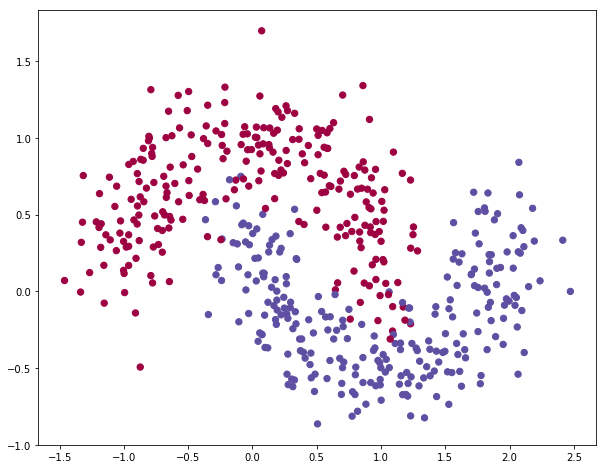

In [10]:
# Representamos los datos
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

### Los bloques del MLP

<img src="./imgs/mlp_details.png" width="65%" />

In [8]:
import random
random.seed(123)

# Calcula un número aleatorio en [a,b)
def rand(a, b):
    return (b-a)*random.random() + a

Necesitamos una función aleatoria para poder inicializar los valores de los pesos (punto del que parte la búsqueda de optimización).

In [9]:
# Crea una Matriz 
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])

Definimos la función de activación. En nuestro caso, la función sigmoide:

In [10]:
# Función sigmoide
def sigmoid(x):
    return 1/(1+np.exp(-x))
    # Puede haber otras opciones, como:
    # return math.tanh(x)


Y damos también la derivada de la función sigmoide, que será usada para el proceso de back-propagation:

In [11]:
# Derivada de la sigmooide, en función de la salida (y)
def dsigmoid(y):
    return y - y**2

### Una clase para redes neuronales
Cuando creamos una arquitectura de red neuronal necesitamos conocer el tamaño de cada una de las capas (número de unidades en cada capa). Los pesos se inicializan aleatoriamente.

In [12]:
class MLP:
    def __init__(self, ni, nh, no):
        # Número de nodos de entrada, ocultos y de salida
        self.ni = ni + 1 # +1 para el nodo bias
        self.nh = nh
        self.no = no

        # Activaciones para los nodos
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # Crea pesos
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        
        # Pone los pesos en valores aleatorios
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # Cambia el momento de los pesos
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)
        

    def backPropagate(self, targets, N, M):
        
        if len(targets) != self.no:
            print(targets)
            raise ValueError('Número de valores de salida erróneo')

        # Calcula el error en la capa de salida
        output_deltas = np.zeros(self.no)
        for k in range(self.no):
            error = targets[k]-self.ao[k]
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # Calcula el error en la capa oculta
        hidden_deltas = np.zeros(self.nh)
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error += output_deltas[k]*self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # Actualiza pesos de salida
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] += N*change + M*self.co[j][k]
                self.co[j][k] = change

        # Actualiza pesos de entrada
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j]*self.ai[i]
                self.wi[i][j] += N*change + M*self.ci[i][j]
                self.ci[i][j] = change

        # Calcula el error
        error = 0.0
        for k in range(len(targets)):
            error += 0.5*(targets[k]-self.ao[k])**2
        return error


    def test(self, patterns):
        self.predict = np.empty([len(patterns), self.no])
        for i, p in enumerate(patterns):
            self.predict[i] = self.activate(p)
            
    def activate(self, inputs):
        
        if len(inputs) != self.ni-1:
            print(inputs)
            raise ValueError('Número de entradas erróneo')

        # Activaciones de entrada
        for i in range(self.ni-1):
            self.ai[i] = inputs[i]

        # Activaciones de la capa oculta
        for j in range(self.nh):
            sum_h = 0.0
            for i in range(self.ni):
                sum_h += self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum_h)

        # Activaciones de salida
        for k in range(self.no):
            sum_o = 0.0
            for j in range(self.nh):
                sum_o += self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum_o)

        return self.ao[:]
    

    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: Tasa de Aprendizaje
        # M: Factor momento
        patterns = list(patterns)
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.activate(inputs)
                error += self.backPropagate([targets], N, M)
            if i % 5 == 0:
                print('error en la iteración %d : %-.5f' % (i,error))
            print('Error Final de Entrenamiento: %-.5f' % error)

### Ejecución del modelo sobre los datos de entrada

In [13]:
# Crea una red con dos entradas, un nodo oculto y uno de salida
ann = MLP(2, 1, 1)

%timeit -n 1 -r 1 ann.train(zip(X,y), iterations=2)

error en la iteración 0 : 53.62995
Error Final de Entrenamiento: 53.62995
Error Final de Entrenamiento: 47.35136
44.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Predicción sobre el conjunto de entrenamiento, y medición de la precisión

In [14]:
%timeit -n 1 -r 1 ann.test(X)

6.05 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [19]:
prediction = pd.DataFrame(data=np.array([y, np.ravel(ann.predict)]).T, 
                          columns=["Real", "prediccion"])
prediction.head()

,Real,prediccion
0,1.0,0.491100
1,1.0,0.495469
2,0.0,0.097362
3,0.0,0.400006
4,1.0,0.489664


In [20]:
np.min(prediction.prediccion)

0.07655307811318013

### Visualizando los resultados

In [21]:
# Funciones auxiliares para mostrar la frontera de decisión.
# Genera el plot de contorno para mostrar la frontera.
def plot_decision_boundary(nn_model):
    # Establece los valores mínimo y máximo y da un poco de margen adicional
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Genera una malla de puntos con separación h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    # Calcula las predicciones para los puntos de la malla
    nn_model.test(np.c_[xx.ravel(), yy.ravel()])
    Z = nn_model.predict
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Representa el contorno y los ejemplos
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

Text(0.5,1,'Modelo Inicial')

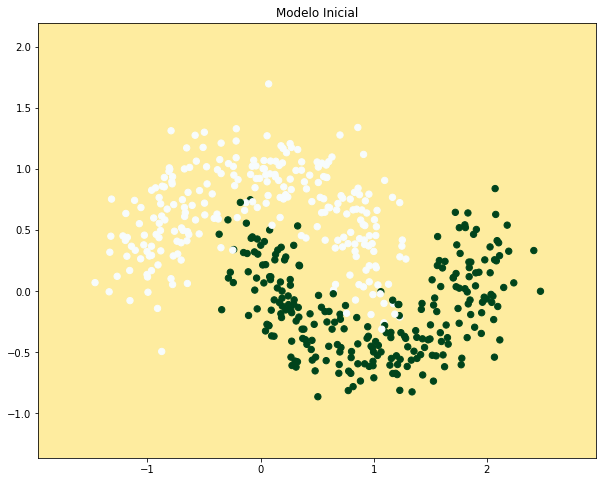

In [22]:
plot_decision_boundary(ann)
plt.title("Modelo Inicial")

**Ejercicio**: 

Crea una RNA con 10 nodos en la capa oculta. ¿Cuál es el impacto en la precisión?

In [ ]:
# Pon el código aquí:

In [27]:
# %load ../solutions/sol_111.py

**Ejercicio:**

Entrena la RNA incrementando el número de epochs. ¿Qué impacto tiene en la precisión?

In [ ]:
#Pon aquí el código

In [28]:
# %load ../solutions/sol_112.py